# Cardiovascular Disease Prediction Model

Project 1: Cardiovascular Disease Prediction

Heart disease, also known as cardiovascular disease, is one of the most serious illnesses in both India and the rest of the globe. According to estimates, cardiac illnesses account for 28.1% of fatalities. More than 17.6 million fatalities, or a large portion of all deaths in 2016, were caused by it in 2016. Therefore, a system that can predict with exact precision and dependability is required for the appropriate and prompt diagnosis as well as the treatment of such diseases. Numerous academics do extensive research utilising a variety of machine learning algorithms to predict heart illness using different datasets that contain numerous factors that lead to heart attacks. Now it is your turn to do a analysis with the given dataset.

 
Project Output Instructions:
•	Perform data pre-processing operations.
•	As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.
•	Show your correlation matrix of features according to the datasets.
•	Find out accuracy levels of various machine learning techniques such as Support Vector Machines (SVM), K-Nearest Neighbor (KNN), Decision Trees (DT) , Logistic Regression (LR) and Random Forest (RF).
•	Build your Machine learning model for heart disease detection according to the result.

Importing the required libraries 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix


DATA Connection

In [3]:
ds = pd.read_csv(
    r"C:\Users\hp\repositories\Corizo\Corinzo\AI\Project\Minor\cardio_train .csv",
    sep=";",
    index_col=0,
)

Data Preprocessing

In [4]:

data = ds.copy()
data["age"] = (data["age"] / 365).round().astype(int)

data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76.0,120,80,1,1,1,0,1,0
99995,62,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1


Removing Null Values

In [1]:
data.dropna()

NameError: name 'data' is not defined

Removing Blood Pressure vlues that are too low and too high or unrealistic


In [6]:
data = data[(data["ap_hi"] >= 70) & (data["ap_hi"] <= 250)]
data = data[(data["ap_lo"] >= 40) & (data["ap_lo"] <= 200)]
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76.0,120,80,1,1,1,0,1,0
99995,62,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1


Ploting all possible Graphs and visuals


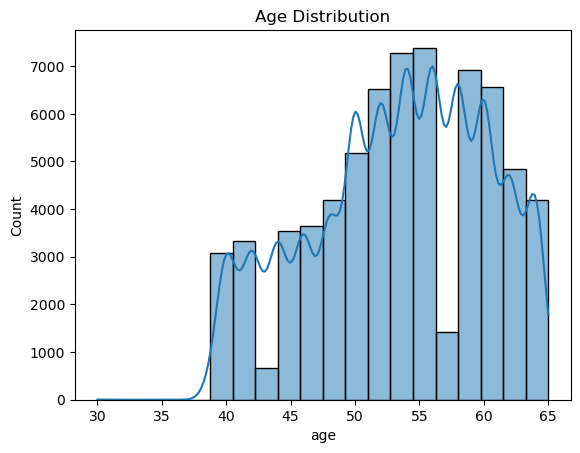

In [7]:
sns.histplot(data["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()


From this graph we can say that peoples having age between 50 years to 60 years are more prone to Cardiovascular Disease

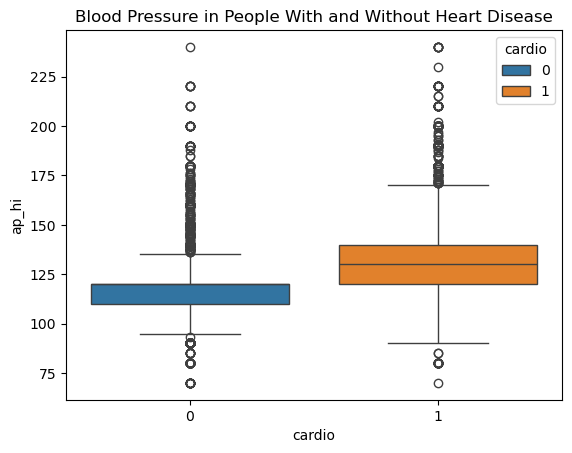

In [8]:
sns.boxplot(x="cardio", y="ap_hi",hue="cardio", data=data)
plt.title("Blood Pressure in People With and Without Heart Disease")
plt.show()


cardio = 0 → No cardiovascular disease

cardio = 1 → Cardiovascular disease presen

higher systolic blood pressure is associated with cardiovascular disease
thus we can use ap_hi in our prediction model

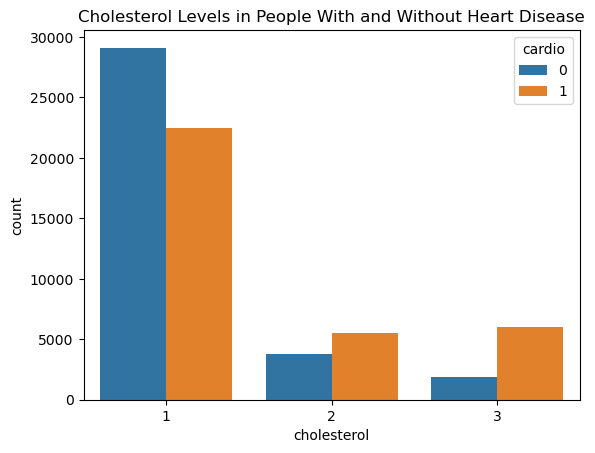

In [9]:
sns.countplot(x="cholesterol", hue="cardio", data=data)
plt.title("Cholesterol Levels in People With and Without Heart Disease")
plt.show()


cardio = 0 → No cardiovascular disease

cardio = 1 → Cardiovascular disease present

The graph shows that as cholesterol levels increase, the number of people with heart disease (cardio = 1) also increases.

Especially at cholesterol level 3, most people have heart disease

thus we can say higher cholesterol is linked to cardiovascular disease

We can include cholesterol as a feature in our prediction model.

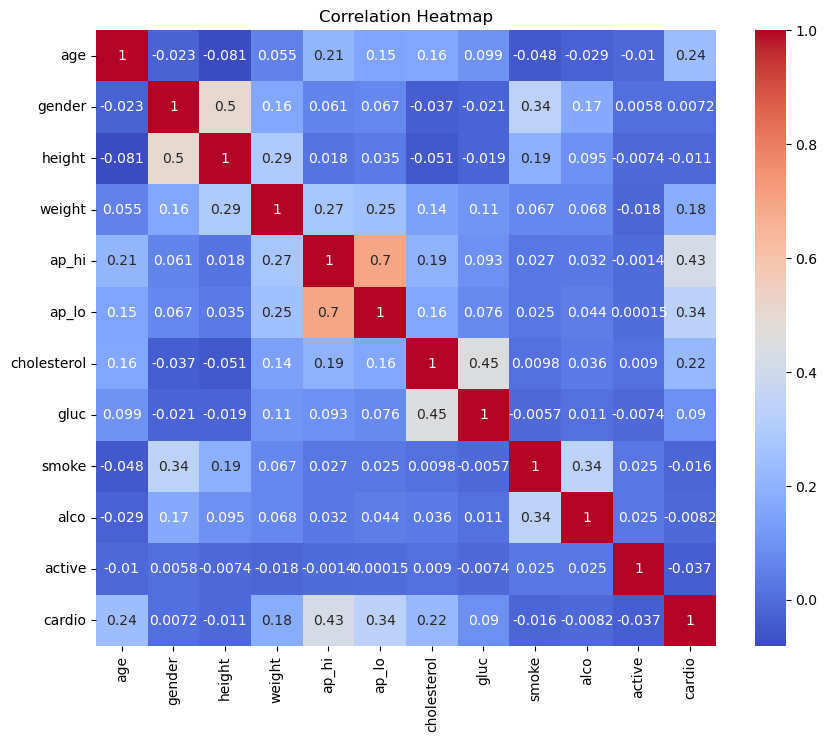

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


The heatmap shows how closely related each feature is to the others.

1 = strong positive relationship

-1 = strong negative relationship

0 = no relationship

clear correlation with cardio can be useful in our prediction model.

Model training

Splitting Data Into test and train size and applying test-train model

In [11]:
x = data.drop("cardio", axis=1)
y = data["cardio"]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=0
)


In [13]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
58672,39,2,177,80.0,120,80,1,1,1,1,1
26149,50,1,157,67.0,120,80,2,1,0,0,0
41795,64,1,164,113.0,140,90,3,1,0,0,1
64972,40,1,158,89.0,110,70,1,1,0,0,1
13617,56,1,164,87.0,130,80,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
30894,52,2,207,78.0,100,70,1,1,0,1,1
66690,44,2,164,61.0,130,80,1,1,0,0,0
61975,63,1,162,74.0,120,60,1,1,0,0,1


In [14]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
25977,50,2,160,72.0,120,80,2,2,0,0,0
64408,40,1,167,64.0,120,80,1,1,0,0,1
20689,64,1,156,77.0,110,70,1,3,0,0,1
57682,44,1,161,59.0,120,60,1,1,0,0,1
23120,56,1,156,54.0,120,70,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12938,54,1,169,70.0,110,80,1,1,0,0,1
42302,53,1,161,72.0,130,90,1,1,0,0,1
23125,50,1,163,71.0,120,80,3,1,0,0,0


In [15]:
y_train

id
58672    0
26149    1
41795    1
64972    0
13617    1
        ..
30894    0
66690    1
61975    1
63341    0
99244    1
Name: cardio, Length: 55019, dtype: int64

In [16]:
y_test

id
25977    1
64408    0
20689    0
57682    0
23120    1
        ..
12938    0
42302    1
23125    0
34108    1
93311    1
Name: cardio, Length: 13755, dtype: int64

Scaling X

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [18]:
ACC_scores=[]

1]. Logistic Regression

In [19]:

model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train_scaled, y_train)
y_pred_LR = model_LR.predict(X_test_scaled)


In [20]:
acc_LR = accuracy_score(y_test, y_pred_LR)
acc_LR

0.7262086513994911

In [21]:
ACC_scores.append(acc_LR)

2]. Naive Bayes

In [22]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)
y_pred_nb = model_nb.predict(X_test_scaled)

In [23]:
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_nb

0.7083242457288259

In [24]:
ACC_scores.append(acc_nb)

3]. KNN

In [25]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(X_test_scaled)

In [26]:
acc_KNN = accuracy_score(y_test, y_pred_KNN)
acc_KNN

0.6983642311886586

In [27]:
ACC_scores.append(acc_KNN)

4]. DTC

In [28]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train_scaled, y_train)
y_pred_DTC = model_DTC.predict(X_test_scaled)

In [29]:
acc_DTC = accuracy_score(y_test, y_pred_DTC)
acc_DTC

0.6363504180298073

In [30]:
ACC_scores.append(acc_DTC)

5] RF

In [31]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_scaled, y_train)
y_pred_RF = model_RF.predict(X_test_scaled)

In [32]:
acc_RF = accuracy_score(y_test, y_pred_RF)
acc_RF

0.7062886223191567

In [33]:
ACC_scores.append(acc_RF)

In [34]:
print(ACC_scores)

[0.7262086513994911, 0.7083242457288259, 0.6983642311886586, 0.6363504180298073, 0.7062886223191567]


In [35]:
highest_ACC= max(ACC_scores)

In [36]:
print(highest_ACC)

0.7262086513994911


Compare model performances

In [37]:
models = {
    "Logistic Regression": model_LR,
    "K-Nearest Neighbors": model_KNN,
    "Decision Tree": model_DTC,
    "Random Forest": model_RF,
    "Naive Bayes": model_nb,
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    accuracy_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")





Logistic Regression Accuracy: 0.7261
K-Nearest Neighbors Accuracy: 0.6897
Decision Tree Accuracy: 0.6409
Random Forest Accuracy: 0.7087
Naive Bayes Accuracy: 0.7083


Select and train the best model

In [38]:

best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
best_model.fit(x_train, y_train)

print(f"Best Performing Model: {best_model_name}")
print(f"Test Accuracy: {accuracy_scores[best_model_name]:.4f}")


Best Performing Model: Logistic Regression
Test Accuracy: 0.7261


Evaluate the final model

In [39]:
y_pred = best_model.predict(x_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6977
           1       0.75      0.67      0.71      6778

    accuracy                           0.73     13755
   macro avg       0.73      0.73      0.72     13755
weighted avg       0.73      0.73      0.73     13755



Confusion matrix

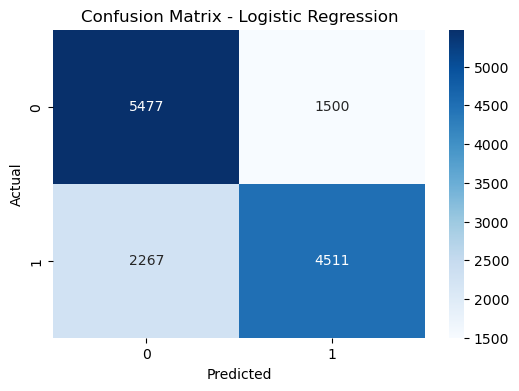

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


ModuleNotFoundError: No module named 'tensorflow'